### Student Performance Analysis

### 1. Problem Statement

In this project we will understand how the student's performance (best scores) is affected by other variables such as Gender, Ethnicity,Parental level of education, Lunch and Test Prepartion course

### 2. Data Collection

The dataset is taken from kaggle 

Data Source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
This dataset consists of 8 columns and  1000 rows.

### Importing Data and required packages

In [2]:
#importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing dataset 

df = pd.read_csv(r"D:\Projects\mlprojects\notebook\data\StudentsPerformance.csv")


#### Show first 5 records

In [4]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Check for any missing values 

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset 

Checking Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

Checking summary statistics

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#####  Insight

-   From above description of numerical data, all means are very close to each other - between 66 and 68.05;
-   All standard deviations are also close - between 14.6 and 15.19;
-   While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

###  Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Exploring data 

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [11]:
## Extracting count of  numerical and categorical columns

num_features = [feature for feature in df.columns if df[feature].dtype != "O"]
cat_features = [feature for feature in df.columns if df[feature].dtype == "O"]

#displaying values
print("We have {} numerical features: {}".format(len(num_features), num_features))
print("\nWe have {} categorical features: {}".format(len(cat_features), cat_features))




We have 3 numerical features: ['math score', 'reading score', 'writing score']

We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


We will be adding an 2 features "Total Score" and "Average" by using "math_score","reading score", "writing score"

In [12]:
df["total_score"] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total_score']/3
df.head(2)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


Find the number of students scoring with full marks in each subject 



In [13]:
reading_full = df[df['reading score'] == 100]['average score'].count()
math_full = df[df['math score'] == 100]['average score'].count()
writing_full = df[df['writing score'] == 100]['average score'].count()

#Displaying records
print(f"Numnber of students scoring full marks in Maths: {math_full}")
print(f"Numnber of students scoring full marks in Reading: {reading_full}")
print(f"Numnber of students scoring full marks in Writing: {writing_full}")



Numnber of students scoring full marks in Maths: 7
Numnber of students scoring full marks in Reading: 17
Numnber of students scoring full marks in Writing: 14


Students scoring less than 20 marks in each subject

In [14]:
reading_less_20 = df[df['reading score'] <= 20]['average score'].count()
writing_less_20 = df[df['writing score'] <= 20]['average score'].count()
math_less_20 = df[df['math score'] <= 20]['average score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### Insights

- From above values we have the students performed worst in Maths
- We got the best performance in  reading section

### Data Visualization

Visualizing the average score distribution

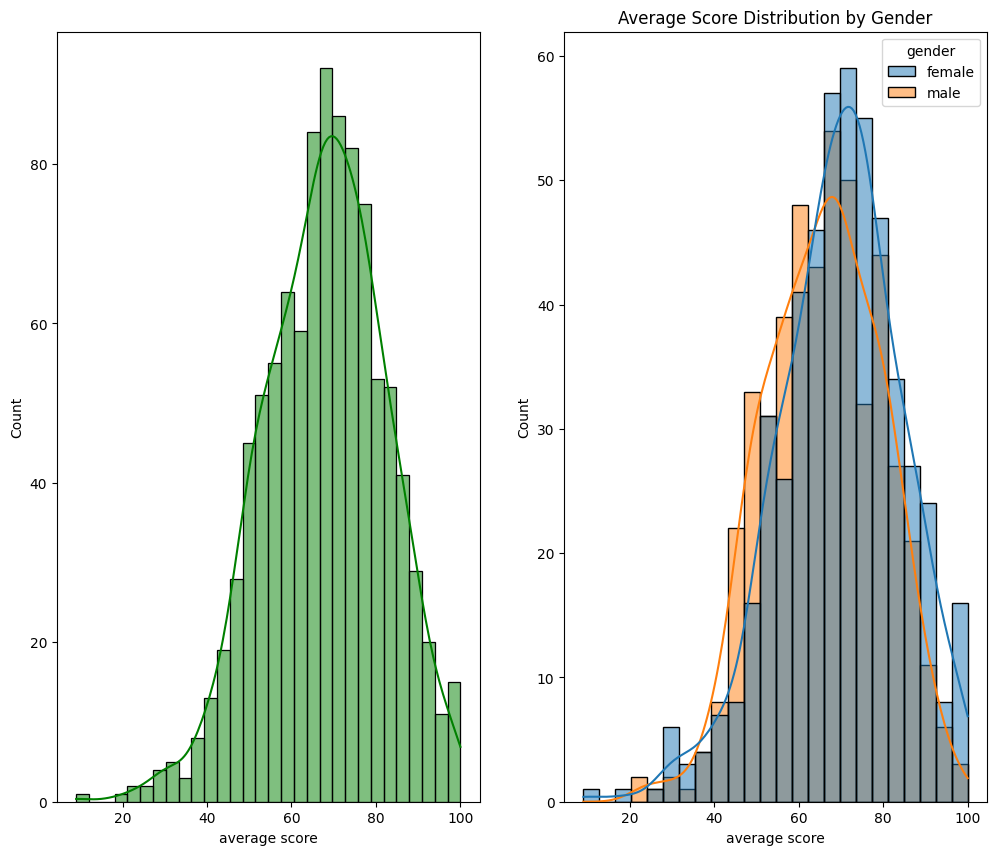

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12,10))

plt.subplot(121)
sns.histplot(data=df, x='average score', bins=30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average score', kde=True, hue='gender')
plt.title("Average Score Distribution by Gender")
plt.show()

From above plot we can conclude that female students are performing better than that of male students

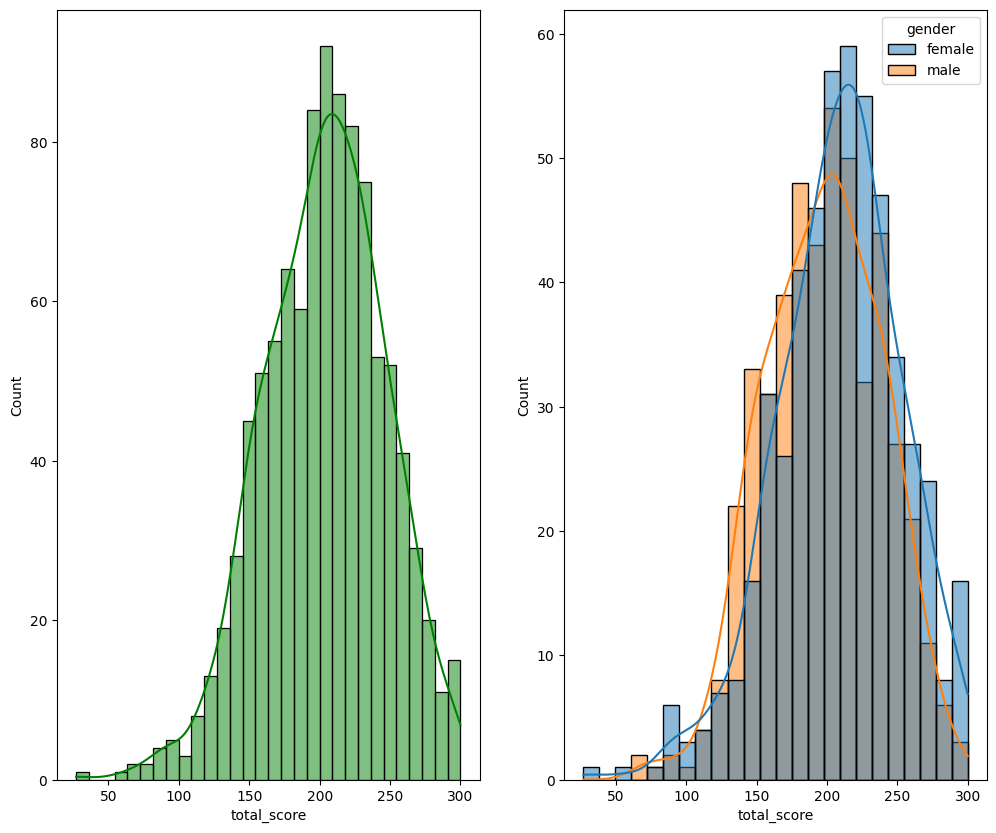

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 10))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

From above plot we can conclude that female students are performing better than that of male students

Plotting Average score by lunch and gender

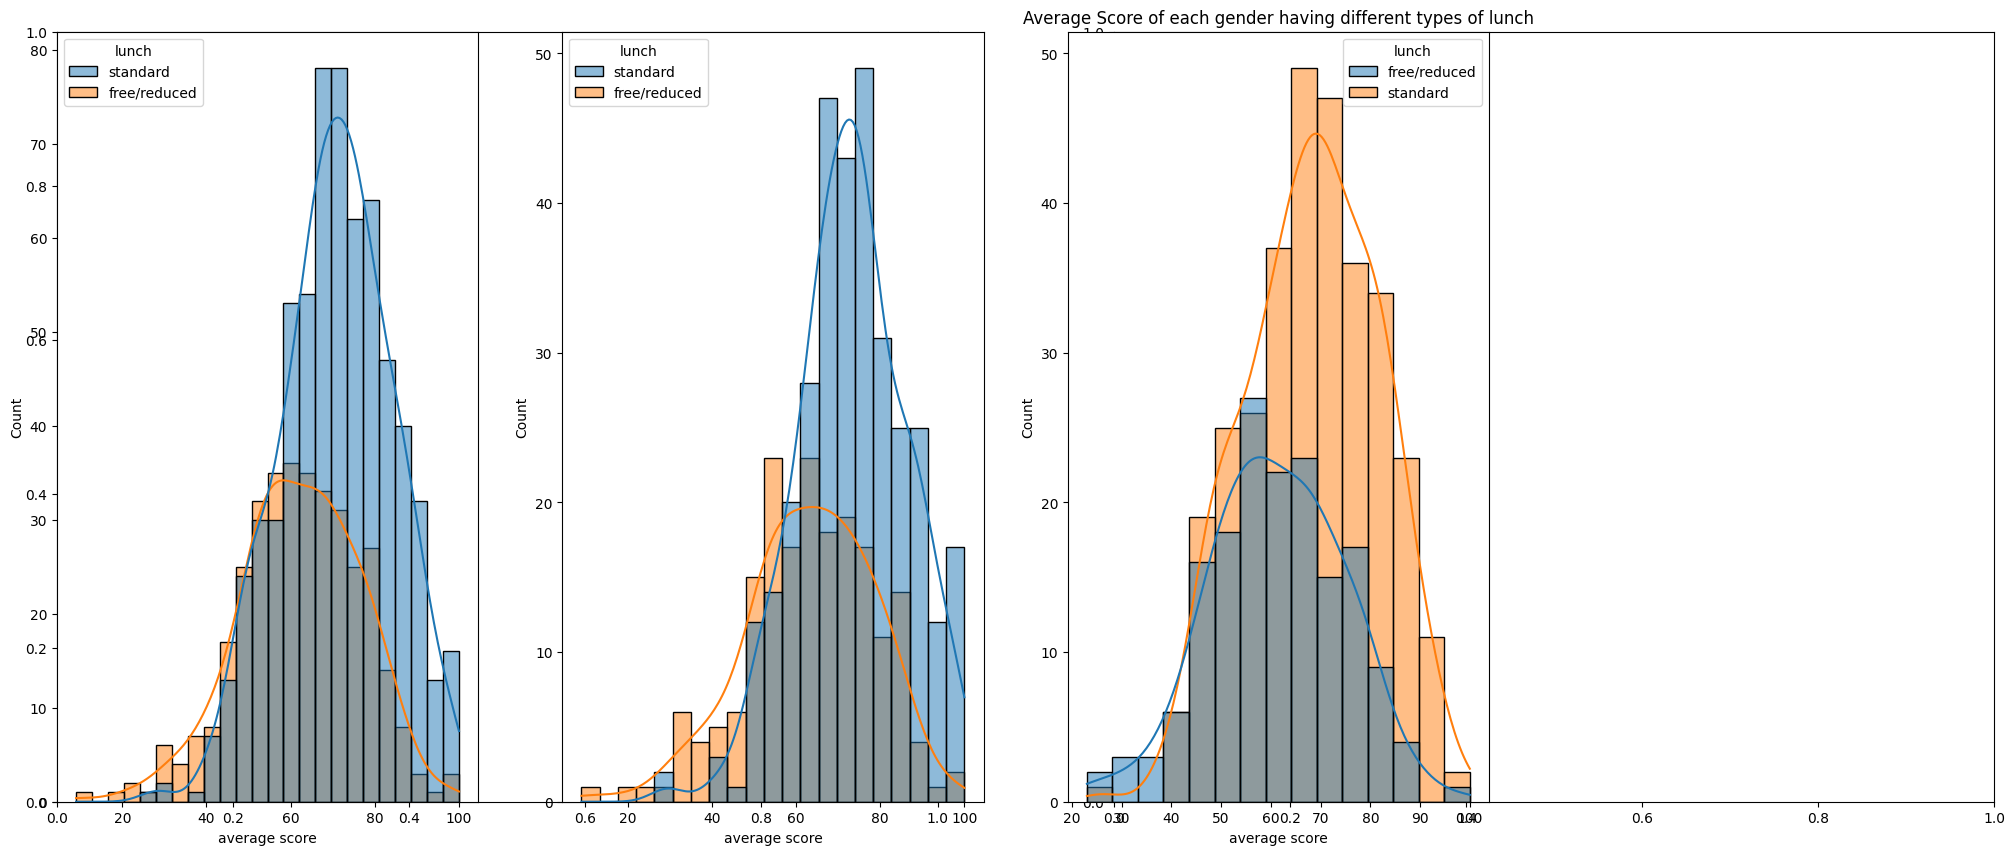

In [17]:
plt.subplots(1,2,figsize=(25,10))
plt.subplot(141)
sns.histplot(data=df,x='average score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='lunch')
plt.title("Average Score of each gender having different types of lunch")
plt.show()

Insights

- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

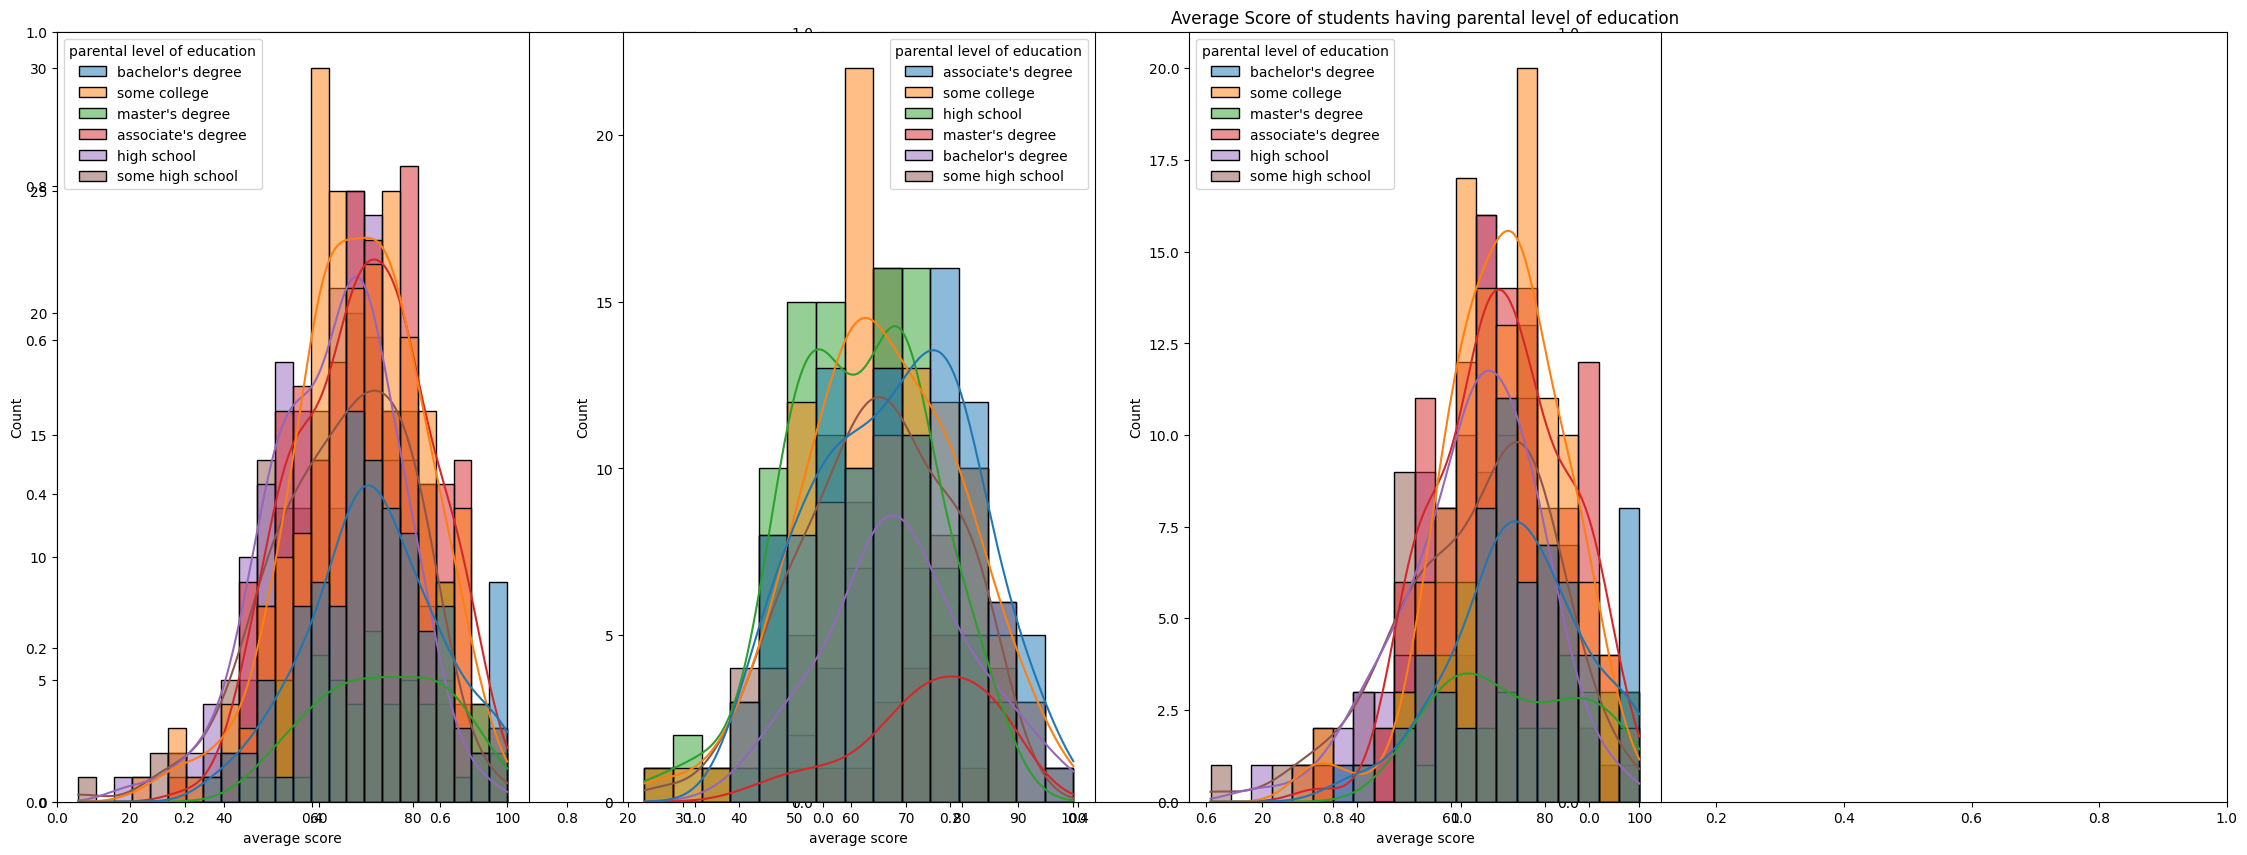

In [18]:
plt.subplots(1,3,figsize=(28,10))
plt.subplot(141)
ax =sns.histplot(data=df,x='average score',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='parental level of education')
plt.title("Average Score of students having parental level of education")
plt.show()

Insights¶
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

Getting insights from average score based of the groups

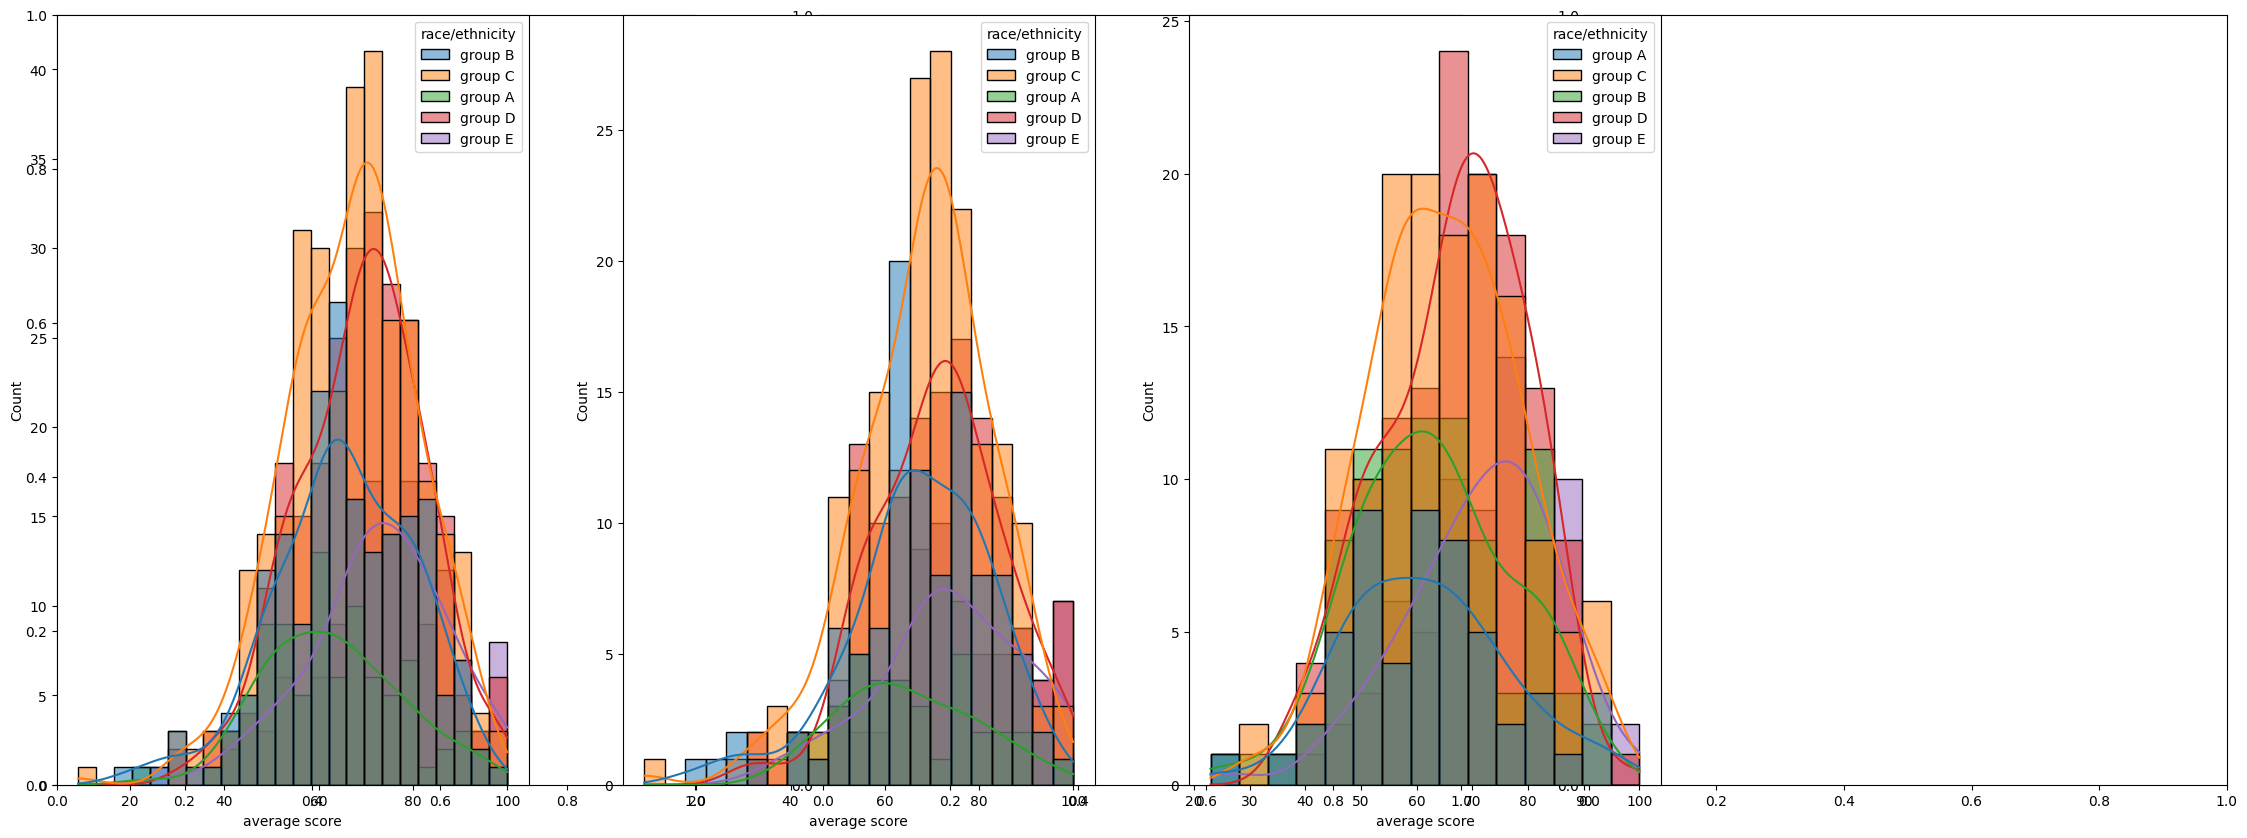

In [19]:
plt.subplots(1,3,figsize=(28,10))
plt.subplot(141)
ax =sns.histplot(data=df,x='average score',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='race/ethnicity')
plt.show()

Insights

- Students of group A  and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male/female

Maximum score of students obtained among all the subjects

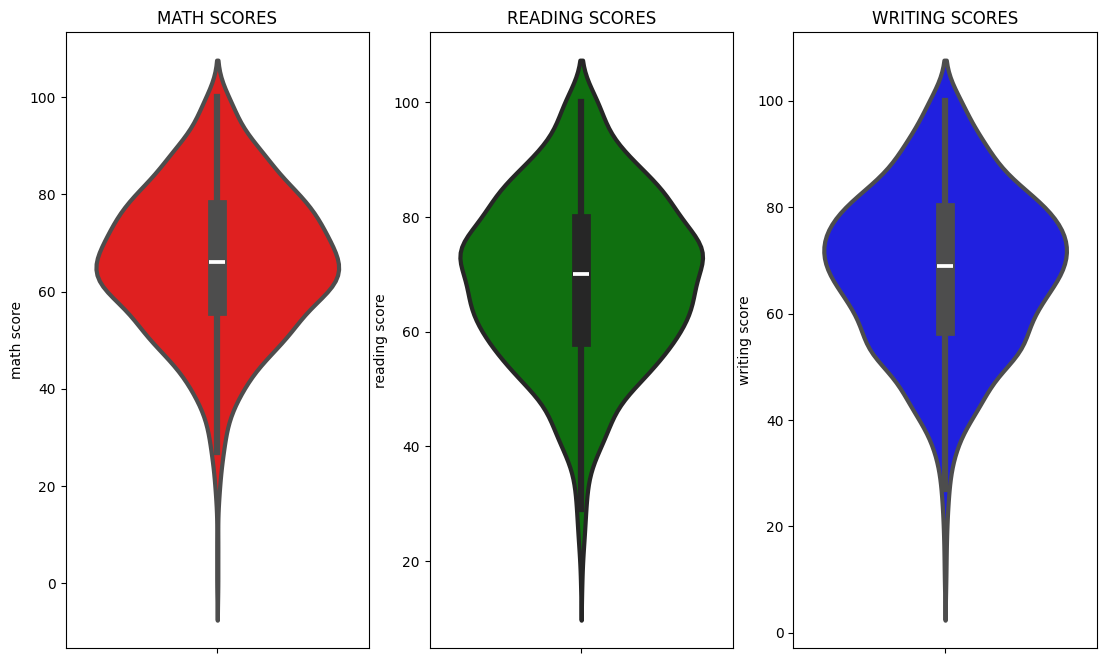

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### Multivariate Analysis

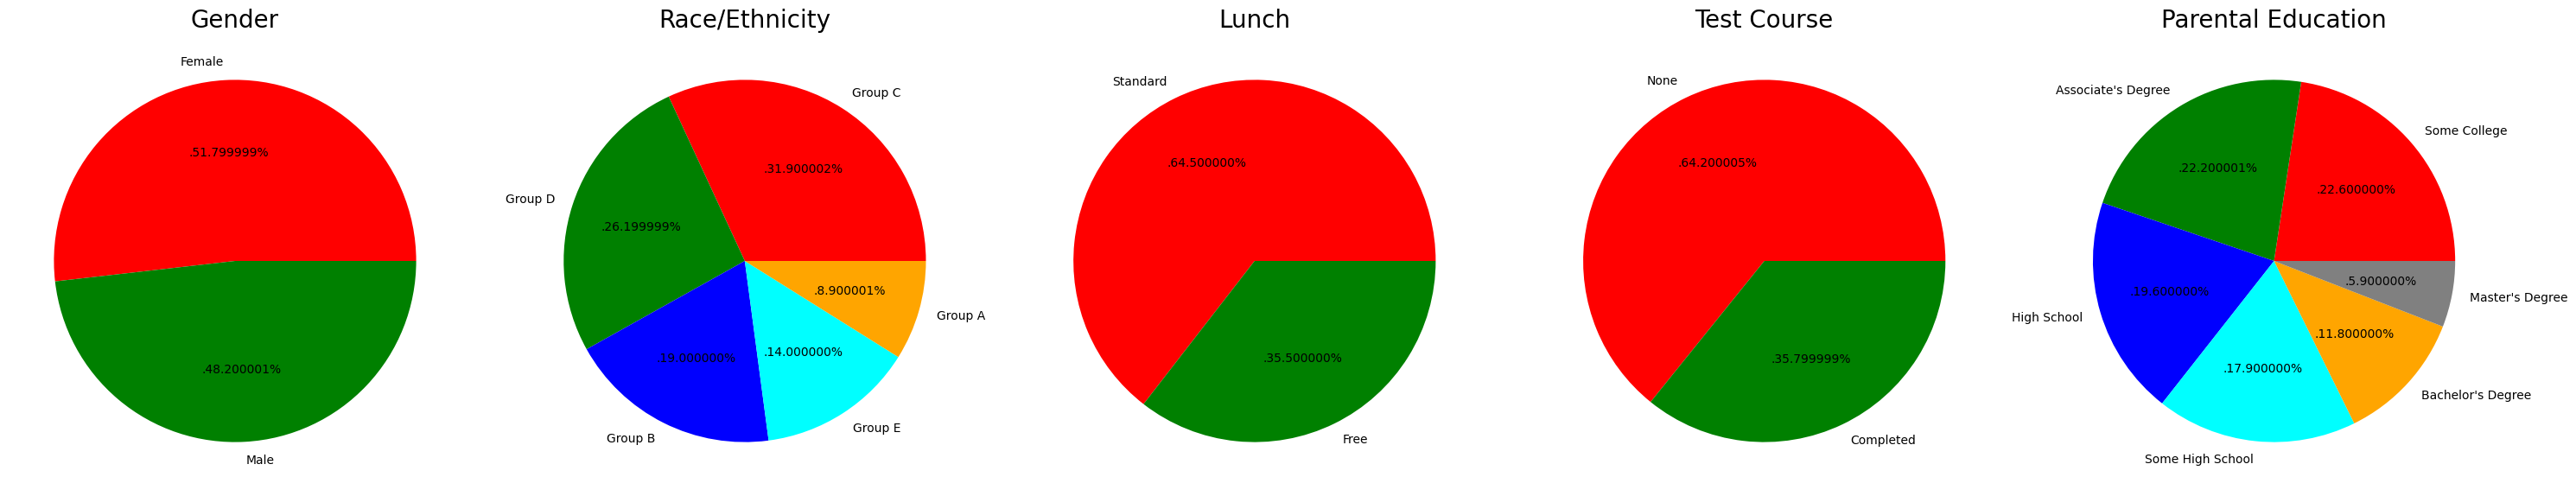

In [21]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights

-   Number of Male and Female students are almost equal
-   Number of students in group C is highest
-   Number of students who have standard lunch are higher
-   Number of students who have not enrolled in any test prepartion course are greater
-   Number of students whose parental education is "Some College" is greater than "Associate Degree"

### Feature Wise Visualization

##### Gender Column

- How is distribution of Gender?
- Is gender has any impact of student's performance?

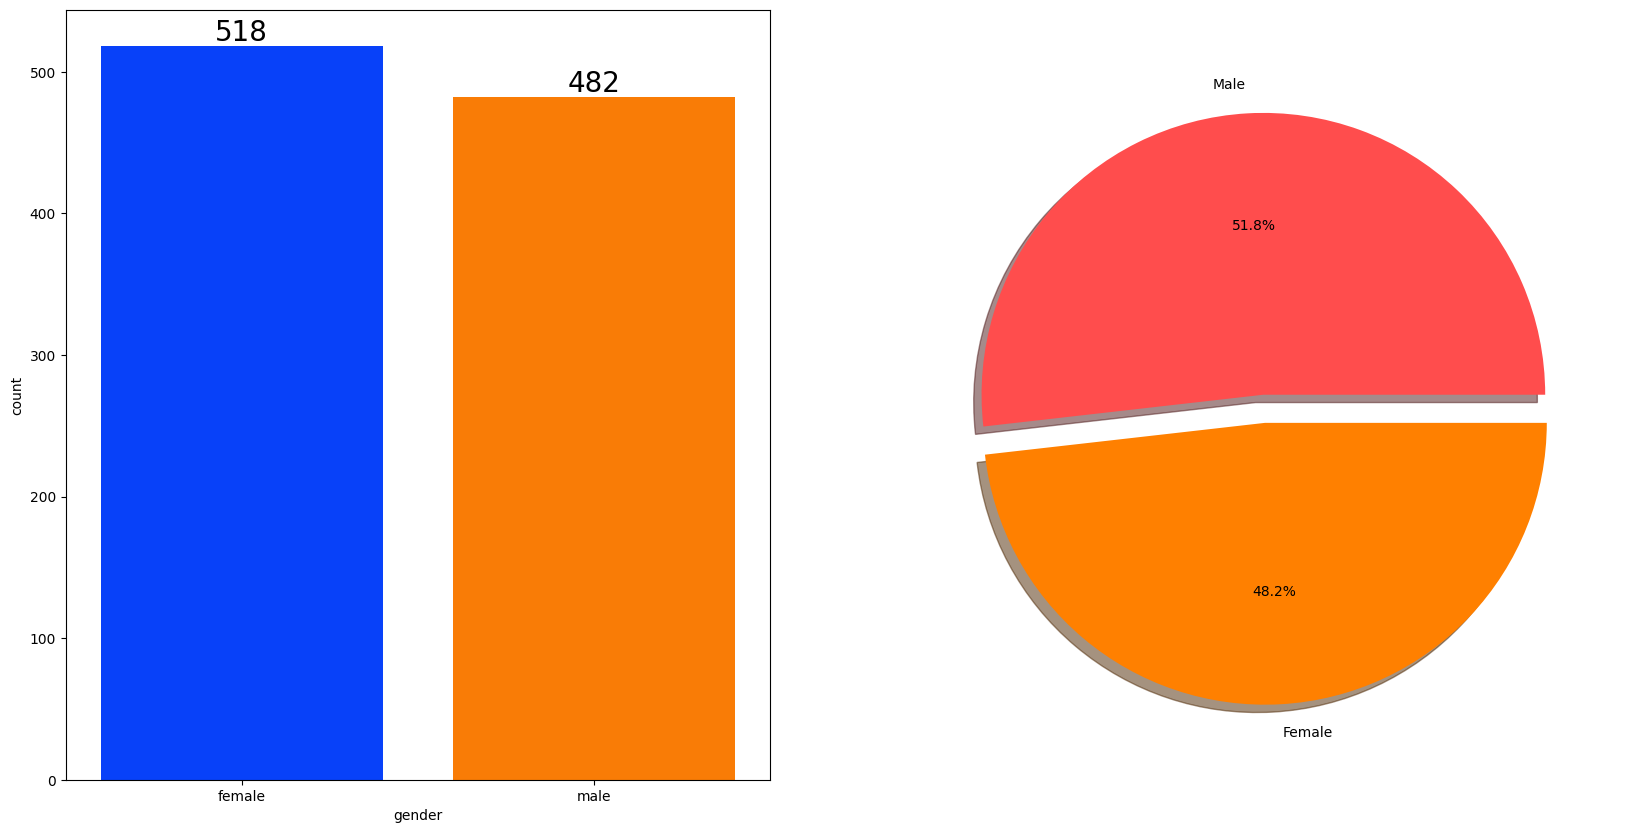

In [22]:
#---------- UNIVARIATE ANALYSIS--------

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Gender has balanced data with female students are 518(48.2%) and males students are 482(52%)

#### RACE/EHNICITY COLUMN

- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

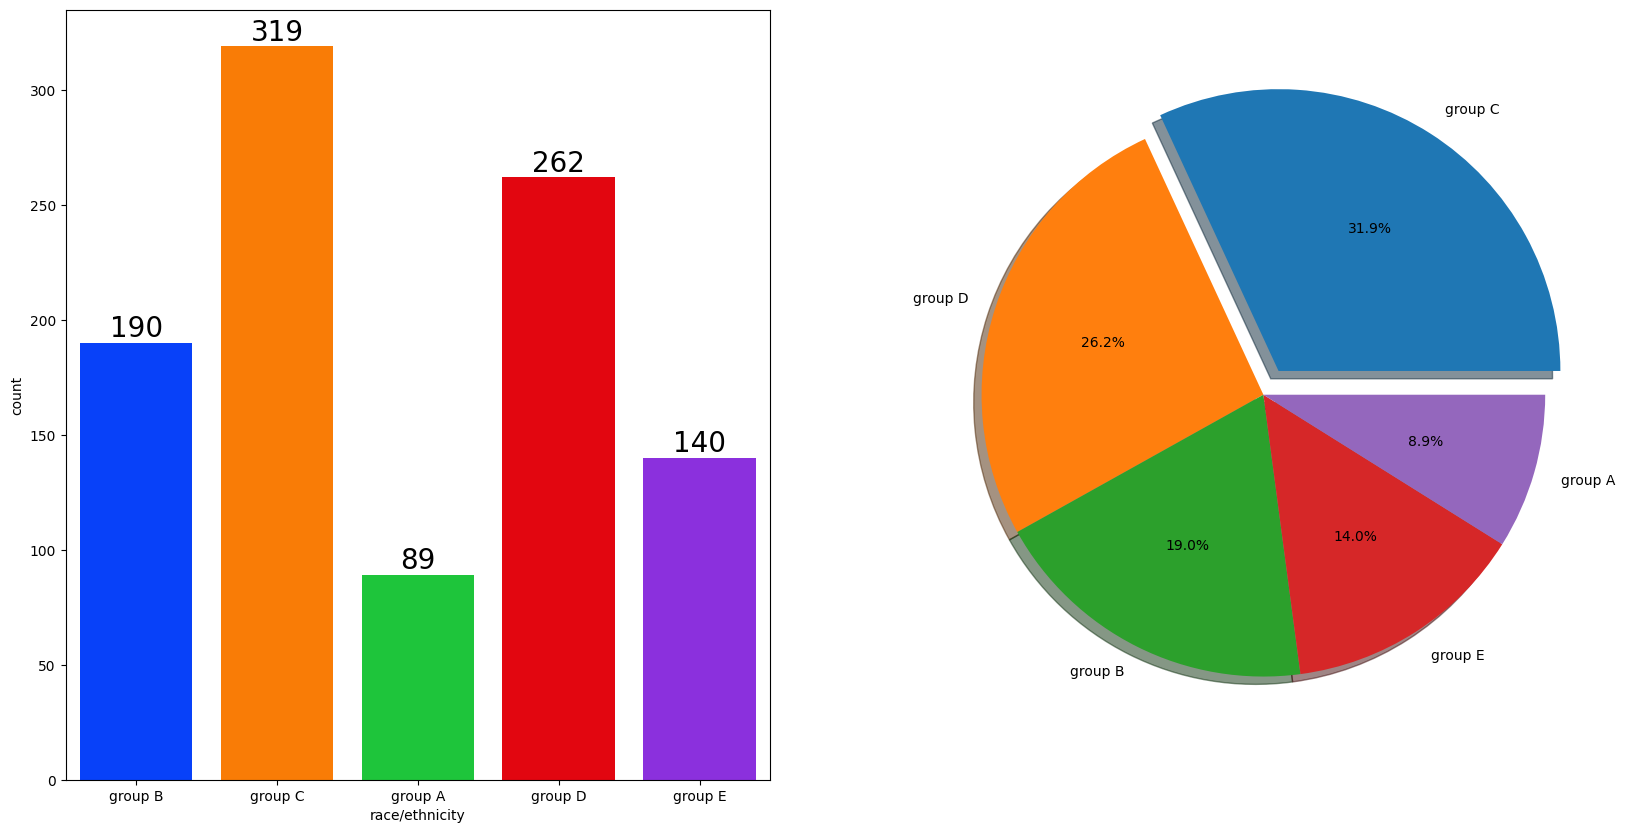

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Insights

- Most of the students belongs from group C/D
- Lowest number of students belongs to group A

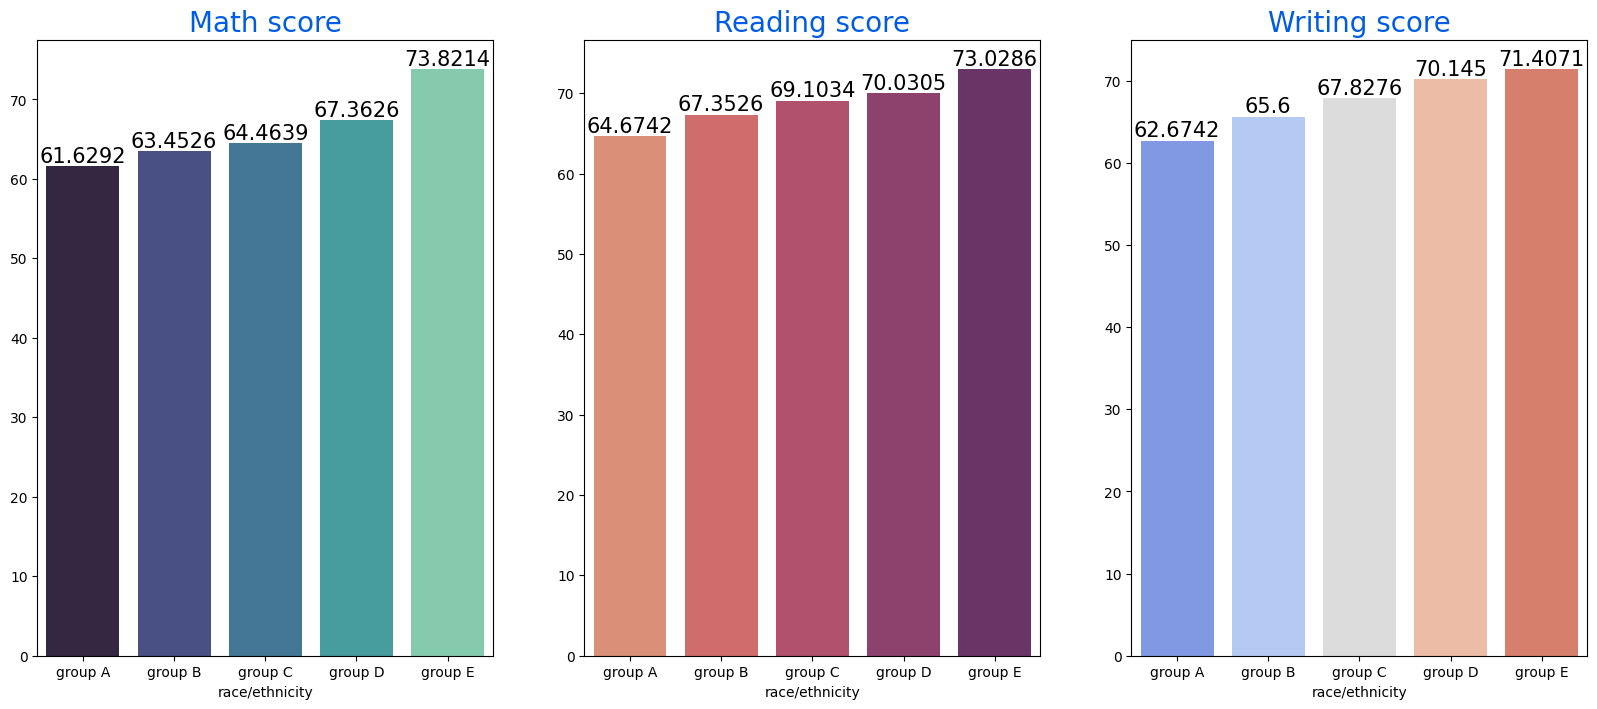

In [29]:
# Is Race/Ehnicity has any impact on student's performance ?


group_data = df.groupby('race/ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20,8))
sns.barplot(x=group_data['math score'].mean().index, y=group_data['math score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=group_data['reading score'].mean().index,y=group_data['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=group_data['writing score'].mean().index,y=group_data['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights 

- Group E students has scored highest marks among other groups.
- Group A has scored the lowest marks.



### Cheking outliers

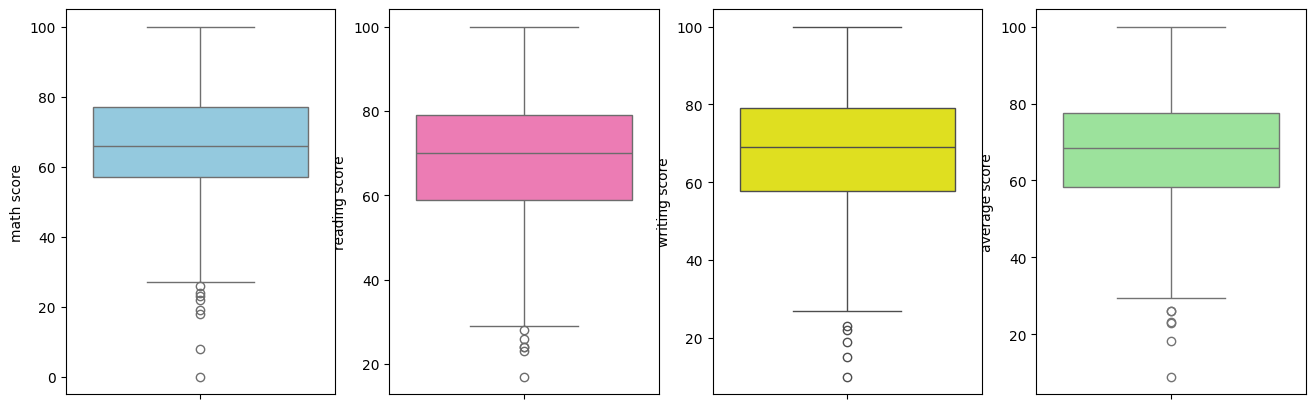

In [33]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'],color='lightgreen')
plt.show()

### Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.